In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = "C:/Users/Admin/Downloads/Parkinson's/drawings/wave/training"
test_dir = "C:/Users/Admin/Downloads/Parkinson's/drawings/wave/testing"

In [3]:
batch_size = 1
epochs = 1
img_height = 196
img_width = 196

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 93 images belonging to 2 classes.


In [6]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 60 images belonging to 2 classes.


In [7]:
import warnings
 

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [8]:
from tensorflow.keras.applications.xception import Xception


In [9]:
 base_model = Xception(weights = 'imagenet', include_top=False, input_shape=(196, 196, 3))


In [10]:
base_model.trainable = False

In [11]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 196, 196, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 97, 97, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 97, 97, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 24, 24, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 24, 24, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_2 (Conv2D)              (None, 12, 12, 728)  186368      ['add_1[0][0]']                  
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 12, 12, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 12, 12, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 12, 12, 728)  536536     ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 12, 12, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 12, 12, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 12, 12, 728)  2912       ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 12, 12, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 12, 12, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 12, 12, 728)  0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 12, 12, 728)  0          ['add_10[0][0]']                 
 on)      

In [12]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D


In [13]:
xception_net = tf.keras.models.Sequential()

xception_net.add(base_model)
xception_net.add(GlobalAveragePooling2D())
xception_net.add(Dense(2, activation = 'softmax'))
xception_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 20,865,578
Trainable params: 4,098
Non-trainable params: 20,861,480
_________________________________________________________________


In [14]:
xception_net.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = xception_net.fit(train_data_gen, epochs=20,
validation_data= val_data_gen,)

Epoch 1/20
93/93 [==============================] - 15s 121ms/step - loss: 0.6071 - accuracy: 0.7097 - val_loss: 0.4788 - val_accuracy: 0.7833
Epoch 2/20
93/93 [==============================] - 11s 115ms/step - loss: 0.4353 - accuracy: 0.7957 - val_loss: 0.4165 - val_accuracy: 0.8000
Epoch 3/20
93/93 [==============================] - 11s 118ms/step - loss: 0.3998 - accuracy: 0.8172 - val_loss: 0.3956 - val_accuracy: 0.7667
Epoch 4/20
93/93 [==============================] - 10s 113ms/step - loss: 0.3492 - accuracy: 0.8710 - val_loss: 0.3818 - val_accuracy: 0.7667
Epoch 5/20
93/93 [==============================] - 11s 120ms/step - loss: 0.3316 - accuracy: 0.8065 - val_loss: 0.3882 - val_accuracy: 0.7833
Epoch 6/20
93/93 [==============================] - 11s 118ms/step - loss: 0.2854 - accuracy: 0.8710 - val_loss: 0.3856 - val_accuracy: 0.7833
Epoch 7/20
93/93 [==============================] - 11s 115ms/step - loss: 0.3080 - accuracy: 0.8495 - val_loss: 0.3340 - val_accuracy: 0.8000

In [16]:
xception_net.save('waves.h5')

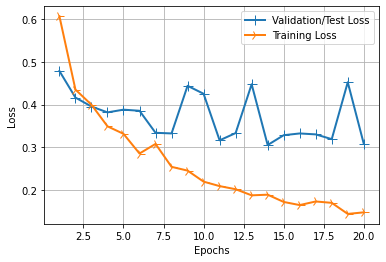

In [17]:


history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

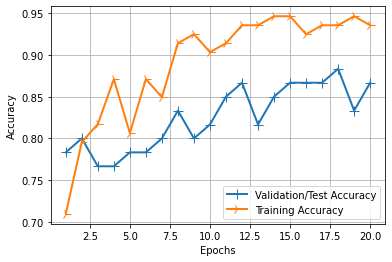

In [18]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
import numpy as np

In [20]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= xception_net.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

60/60 - 5s - 5s/epoch - 82ms/step


In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [23]:
cm_plot_labels = ['healthy-wave','parkinson-wave']

Confusion matrix, without normalization
[[24  7]
 [ 1 28]]
Accuracy: 0.867
Precision: 0.800
Recall: 0.867
F-Measure: 0.867


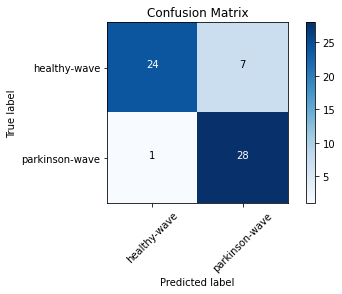

In [24]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)